**Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season etc.**

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [ ]:
# Read the hour.csv file
# YOUR CODE HERE
df = pd.read_csv('hour.csv')

In [ ]:
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [ ]:
print(df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


<ipython-input-5-44a20621af8d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hr', data=df, palette='viridis')


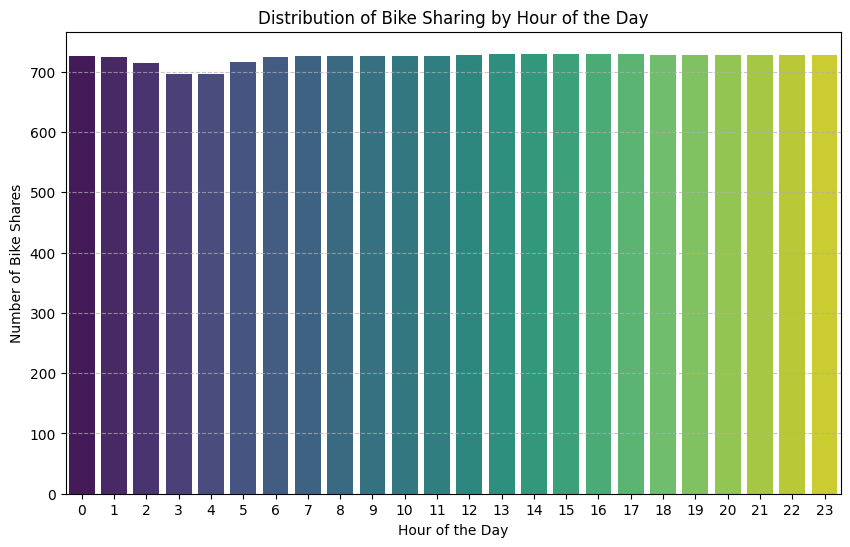

Busiest hours of bike sharing (sorted by count):
hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
8     727
7     727
11    727
9     727
10    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hr', data=df, palette='viridis')
plt.title('Distribution of Bike Sharing by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.xticks(range(0, 24)) # Ensure all hours from 0 to 23 are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Optional: Calculate the busiest hours by counting occurrences
busy_hours = df['hr'].value_counts().sort_values(ascending=False)
# Print the busiest hours
print("Busiest hours of bike sharing (sorted by count):")
print(busy_hours)

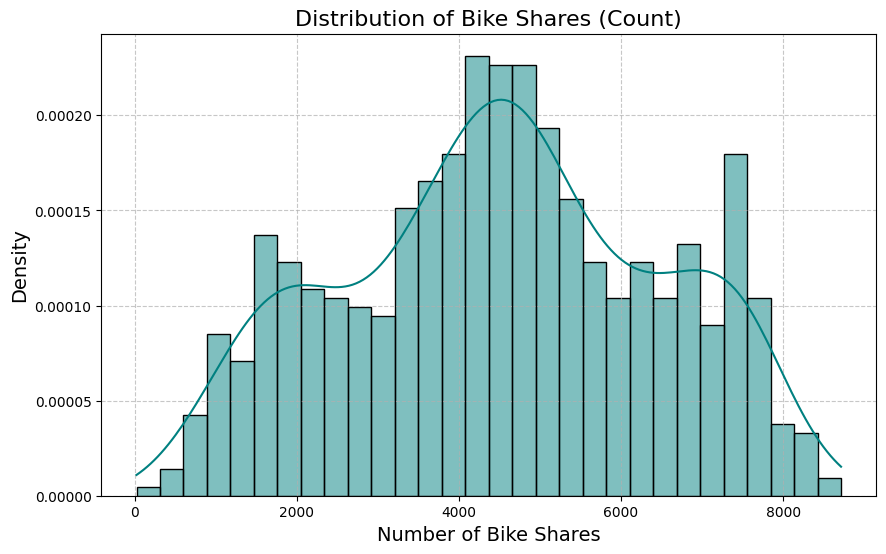

In [ ]:
# YOUR CODE HERE for distribuiton of count variable
df1 = pd.read_csv('day.csv')
# Visualize the distribution of the 'count' variable (number of bike shares)
plt.figure(figsize=(10, 6))
# Plot the histogram of the 'count' column
sns.histplot(df1['cnt'], kde=True, bins=30, color='teal', stat='density')
# Customize plot appearance
plt.title('Distribution of Bike Shares (Count)', fontsize=16)
plt.xlabel('Number of Bike Shares', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

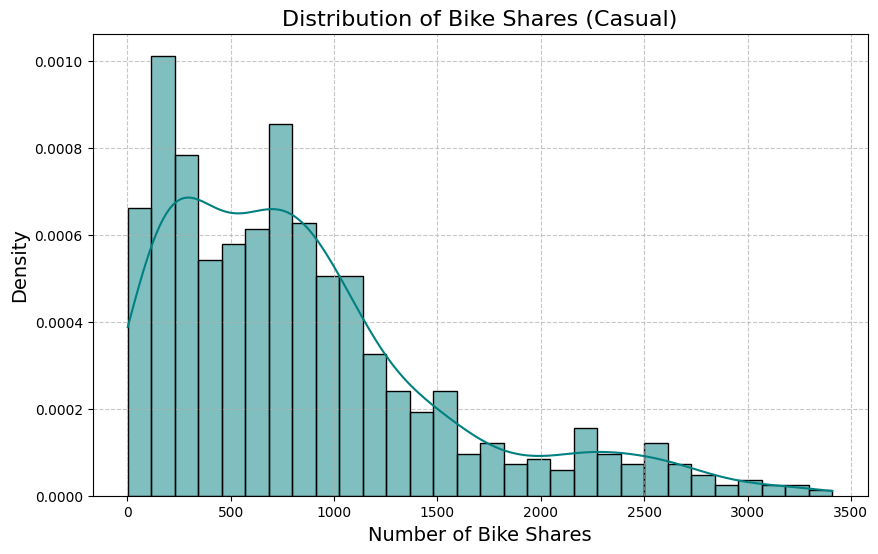

In [ ]:
# YOUR CODE HERE for distribuiton of casual variable
plt.figure(figsize=(10, 6))
# Plot the histogram of the 'count' column
sns.histplot(df1['casual'], kde=True, bins=30, color='teal', stat='density')
# Customize plot appearance
plt.title('Distribution of Bike Shares (Casual)', fontsize=16)
plt.xlabel('Number of Bike Shares', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

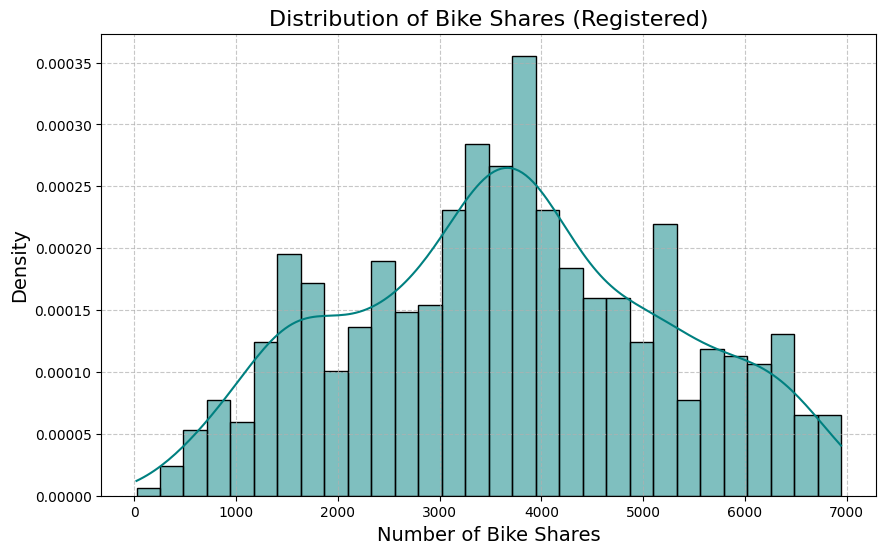

In [ ]:
plt.figure(figsize=(10, 6))
# Plot the histogram of the 'count' column
sns.histplot(df1['registered'], kde=True, bins=30, color='teal', stat='density')
# Customize plot appearance
plt.title('Distribution of Bike Shares (Registered)', fontsize=16)
plt.xlabel('Number of Bike Shares', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

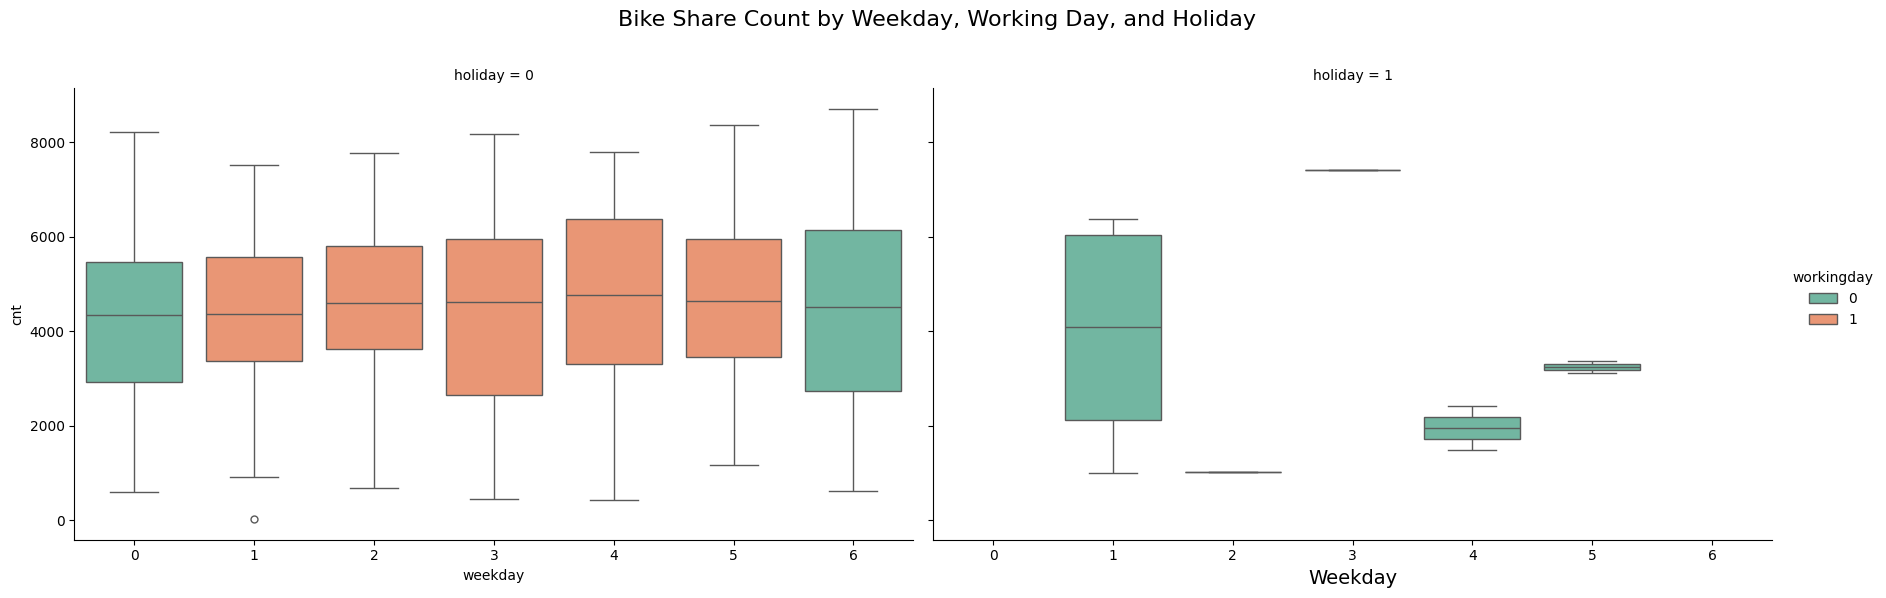

In [ ]:
# YOUR CODE HERE
sns.catplot(
data=df1,
x='weekday',
y='cnt',
hue='workingday', # color by working day
col='holiday', # create separate plots for holidays (0/1)
kind='box', # use boxplot for distribution
palette='Set2',
height=6,
aspect=1.5
)
# Customize the plot
plt.subplots_adjust(top=0.85)
plt.suptitle('Bike Share Count by Weekday, Working Day, and Holiday', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Number of Bike Shares', fontsize=14)
# Show the plot
plt.show()

<ipython-input-11-e3b32bc78151>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['month'] = df_2011['dteday'].dt.month


<Figure size 1000x600 with 0 Axes>

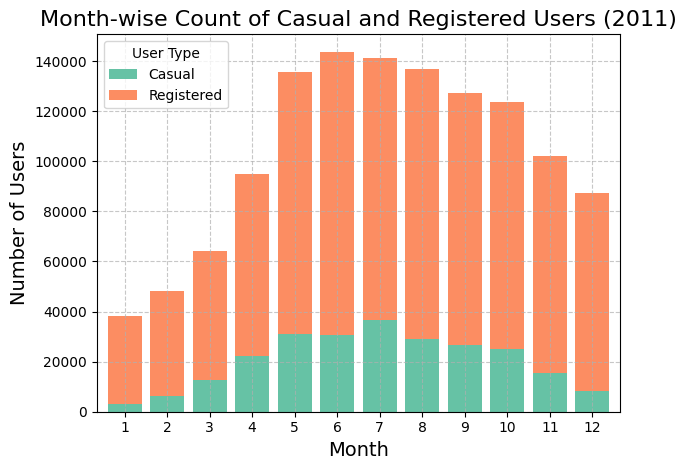

In [ ]:
# stacked bar chart for year 2011
# YOUR CODE HERE
df1['dteday'] = pd.to_datetime(df1['dteday'], format='%Y-%m-%d', errors='coerce')
# Filter the data for the year 2011
df_2011 = df1[df1['dteday'].dt.year == 2011]
# Extract the month from the 'datetime' column (no time needed)
df_2011['month'] = df_2011['dteday'].dt.month
# Group by month and aggregate the counts for 'casual' and 'registered' users
monthly_counts = df_2011.groupby('month')[['casual', 'registered']].sum()
# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], width=0.8)
# Customize the plot
plt.title('Month-wise Count of Casual and Registered Users (2011)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='User Type', labels=['Casual', 'Registered'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-13-7427f5df440b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['month'] = df_2012['dteday'].dt.month


<Figure size 1000x600 with 0 Axes>

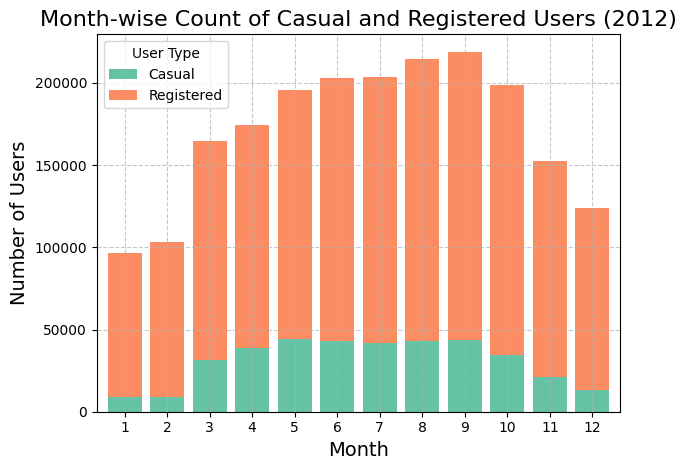

In [ ]:
# stacked bar chart for year 2012
# YOUR CODE HERE
df1['dteday'] = pd.to_datetime(df1['dteday'], format='%Y-%m-%d', errors='coerce')
# Filter the data for the year 2011
df_2012 = df1[df1['dteday'].dt.year == 2012]
# Extract the month from the 'datetime' column (no time needed)
df_2012['month'] = df_2012['dteday'].dt.month
# Group by month and aggregate the counts for 'casual' and 'registered' users
monthly_counts = df_2012.groupby('month')[['casual', 'registered']].sum()
# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], width=0.8)
# Customize the plot
plt.title('Month-wise Count of Casual and Registered Users (2012)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='User Type', labels=['Casual', 'Registered'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

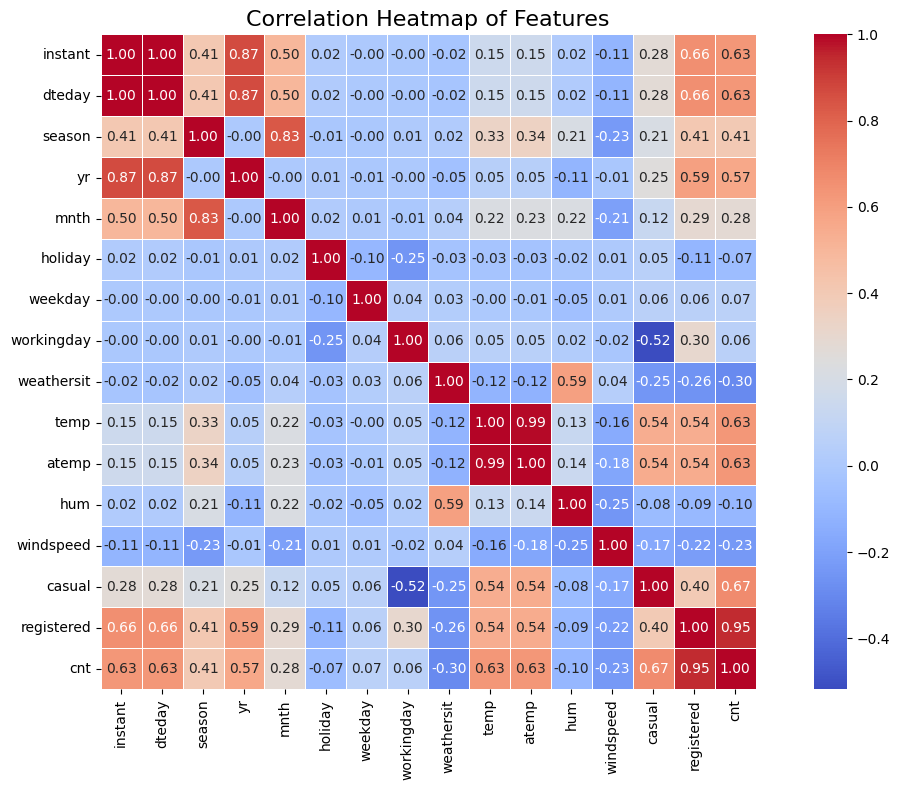

In [ ]:
# YOUR CODE HERE
correlation_matrix = df1.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5)
# Add a title
plt.title('Correlation Heatmap of Features', fontsize=16)
# Show the plot
plt.tight_layout()
plt.show()

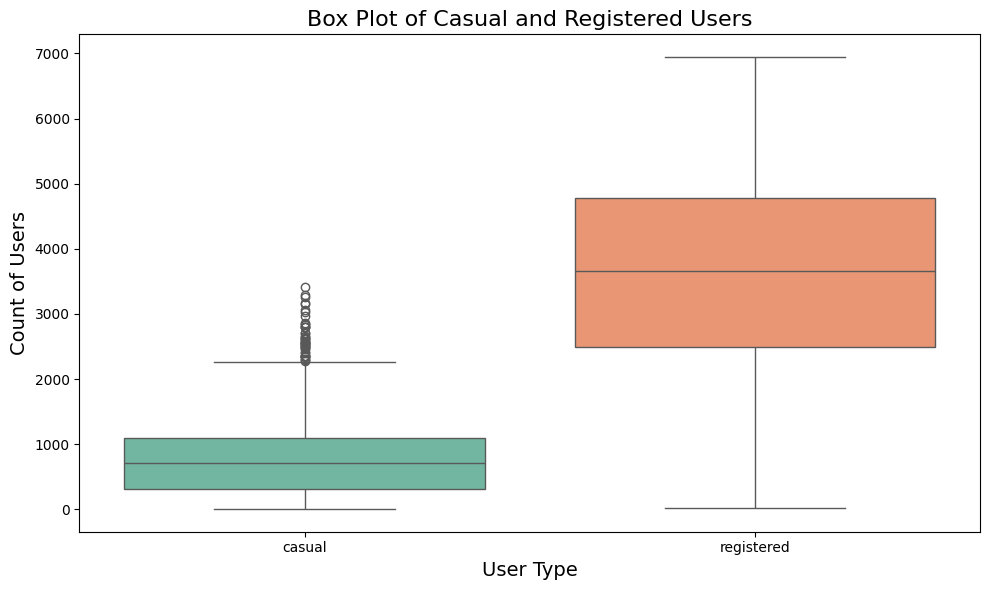

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
# Create a boxplot for casual and registered users
sns.boxplot(data=df1[['casual', 'registered']], palette="Set2")
# Add a title and labels
plt.title('Box Plot of Casual and Registered Users', fontsize=16)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Count of Users', fontsize=14)
# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# YOUR CODE HERE
columns_ =['instant','casual','registered']
df1 = df1.drop(columns = columns_)

In [ ]:
# YOUR CODE HERE
print(df1.dtypes)
# Identify categorical variables: typically 'object', 'category', 'bool'
categorical_vars = df1.select_dtypes(include=['object','category','bool']).columns.tolist()
# Identify continuous variables: typically 'int64','float64'
continuous_vars = df1.select_dtypes(include=['int64','float64']).columns.tolist()
# Print the results
print("Categorical Variables:",categorical_vars)
print("Continuous Variables:",continuous_vars)

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object
Categorical Variables: []
Continuous Variables: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax_scaled = df1.copy()
df_minmax_scaled[continuous_vars] = min_max_scaler.fit_transform(df1[continuous_vars])

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,drop='first')
encoded_array = encoder.fit_transform(df1[categorical_vars])
encoded_df = pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out(categorical_vars))

In [ ]:
# YOUR CODE HERE
target = 'cnt'
# Separate features (X) and target (y) from the one-hot encoded DataFrame
X = df_minmax_scaled.drop(columns=[target])
y = df_minmax_scaled[target]
# Optional: Convert to NumPy arrays if required by your ML algorithm
X_array = X.values
y_array = y.values

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Print the shapes of the resulting splits (optional)
print(f"X_train shape:{X_train.shape}")
print(f"X_test shape:{X_test.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"y_test shape:{y_test.shape}")

X_train shape:(584, 12)
X_test shape:(147, 12)
y_train shape:(584,)
y_test shape:(147,)


In [ ]:
# YOUR CODE HERE
import numpy as np
from scipy.linalg import lstsq
# Drop non-numeric columns (like datetime) and ensure numeric types
X_train_numeric = X_train.select_dtypes(include=[np.number]).values
X_test_numeric = X_test.select_dtypes(include=[np.number]).values
y_train_numeric = y_train.values.astype(float)
y_test_numeric = y_test.values.astype(float)
# Add a bias column (intercept term) to the feature matrices
X_train_with_bias = np.c_[np.ones(X_train_numeric.shape[0]), X_train_numeric]
X_test_with_bias = np.c_[np.ones(X_test_numeric.shape[0]), X_test_numeric]
# Compute the least-squares solution using the normal equation
theta, residuals, rank, singular_values = lstsq(X_train_with_bias, y_train_numeric)
# Print the coefficients
print("Coefficients (theta):", theta)
# Predict on the training and testing sets
y_train_pred = X_train_with_bias @ theta
y_test_pred = X_test_with_bias @ theta
# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train_numeric, y_train_pred)
mse_test = mean_squared_error(y_test_numeric, y_test_pred)
r2_train = r2_score(y_train_numeric, y_train_pred)
r2_test = r2_score(y_test_numeric, y_test_pred)
print(f"Training MSE: {mse_train}, R²: {r2_train}")
print(f"Testing MSE: {mse_test}, R²: {r2_test}")

Coefficients (theta): [ 0.1648602   0.18110534  0.23285752 -0.04865293 -0.04504726  0.05034768
  0.01850033 -0.1456181   0.19363992  0.3057159  -0.09682925 -0.11610797]
Training MSE: 0.01013647389681229, R²: 0.7910851850465888
Testing MSE: 0.009146619530416827, R²: 0.8276670090367211


In [ ]:
# YOUR CODE HERE
import numpy as np
# Ensure X_train and X_test contain only numeric data
X_train_numeric = X_train.select_dtypes(include=[np.number]).values
X_test_numeric = X_test.select_dtypes(include=[np.number]).values
y_train_numeric = y_train.values.astype(float)
y_test_numeric = y_test.values.astype(float)
# Add a bias column (intercept term) to the feature matrix
X_train_with_bias = np.c_[np.ones(X_train_numeric.shape[0]),X_train_numeric]
X_test_with_bias = np.c_[np.ones(X_test_numeric.shape[0]),X_test_numeric]
# Initialize parameters
m,n = X_train_with_bias.shape
theta = np.random.randn(n)
# Random initialization of coefficients
learning_rate = 0.01
# Set a learning rate
iterations = 1000
# Number of iterations
# Gradient Descent
for i in range(iterations):
# Predict values
  y_pred = X_train_with_bias @ theta

In [ ]:
# Calculate cost (Mean Squared Error)
cost = np.mean((y_pred - y_train_numeric)**2)
# Compute the gradient
gradient =(2/ m)* X_train_with_bias.T @ (y_pred - y_train_numeric)
# Update coefficients
theta -= learning_rate * gradient
# Print the cost for every 100 iterations
if i % 100 == 0:
  print(f"Iteration{i}, Cost:{cost}")
# Print the optimized coefficients
print("Optimized Coefficients (theta):",theta)
# Prediction for the test set
y_test_pred = X_test_with_bias @ theta
# Evaluate performance
from sklearn.metrics import mean_squared_error,r2_score
mse_test = mean_squared_error(y_test_numeric,y_test_pred)
r2_test = r2_score(y_test_numeric,y_test_pred)
print(f"Testing MSE:{mse_test}, R²:{r2_test}")

Optimized Coefficients (theta): [-0.31384253 -0.09480317  2.30323158 -0.28131554  0.01881716 -1.4283197
 -0.97524682  0.66412192 -1.26052936  0.45114535  1.00559301 -0.10568333]
Testing MSE:2.7790049525302067, R²:-51.35969789479922


In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score
# Ensure X_train and X_test contain only numeric data
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])
y_train_numeric = y_train.astype(float)
y_test_numeric = y_test.astype(float)
# Initialize the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000,tol=1e-3,random_state=42)
# Fit the model to the training data
sgd_regressor.fit(X_train_numeric,y_train_numeric)
# Predict on the test set
y_test_pred = sgd_regressor.predict(X_test_numeric)
# Calculate the error metrics
mse_test = mean_squared_error(y_test_numeric,y_test_pred)
r2_test = r2_score(y_test_numeric,y_test_pred)
# Print the error metrics
print(f"Testing Mean Squared Error (MSE):{mse_test}")
print(f"Testing R² Score:{r2_test}")

Testing Mean Squared Error (MSE):0.014566134940735512
Testing R² Score:0.7255570112254053


In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Ensure X_train and X_test contain only numeric data
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])
y_train_numeric = y_train.astype(float)
y_test_numeric = y_test.astype(float)
# Initialize the Linear Regression model
linear_regressor = LinearRegression()
# Fit the model to the training data
linear_regressor.fit(X_train_numeric,y_train_numeric)
# Predict on the test set
y_test_pred = linear_regressor.predict(X_test_numeric)
# Calculate the error metrics
mse_test = mean_squared_error(y_test_numeric,y_test_pred)
# Print the error metrics
print(f"Testing Mean Squared Error (MSE):{mse_test}")

Testing Mean Squared Error (MSE):0.009146619530416823


In [ ]:
# YOUR CODE HERE
from sklearn.metrics import r2_score
# Predict on the test set using the fitted model (assuming linear_regressor is fitted)
y_test_pred = linear_regressor.predict(X_test_numeric)
# Calculate the R² (coefficient of determination)
r2_value = r2_score(y_test_numeric,y_test_pred)
# Print the R² value
print(f"R² Score:{r2_value}")

R² Score:0.8276670090367212


In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import pandas as pd

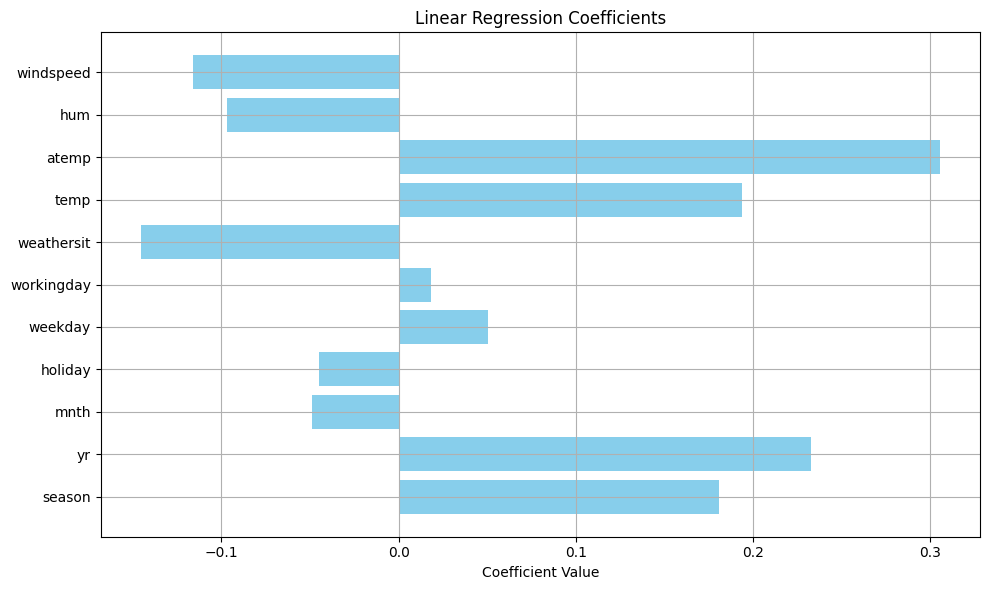

In [ ]:
# Extract coefficients from the fitted Linear Regression model
coefficients = linear_regressor.coef_
# Feature names for labeling (excluding the intercept)
feature_names = X_train_numeric.columns
# Create a DataFrame for easier plotting
coef_df = pd.DataFrame({'Feature':feature_names,'Coefficient':coefficients})
# Plotting the coefficients as a bar chart
plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'],coef_df['Coefficient'],color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# setting up alpha
alpha_values =[0.0001,0.001,0.01,0.1,1,10,100]
# YOUR CODE HERE
from sklearn.linear_model import Lasso
best_alpha = None
best_mse = float('inf')
best_r2 = -float('inf')
results = []
# Iterate over different alpha values
for alpha in alpha_values:
# Initialize the Lasso model with the current alpha
  lasso_regressor = Lasso(alpha=alpha,random_state=42)
# Fit the model to the training data
  lasso_regressor.fit(X_train_numeric,y_train_numeric)
# Predict on the test set
  y_test_pred = lasso_regressor.predict(X_test_numeric)
# Calculate Mean Squared Error
  mse = mean_squared_error(y_test_numeric,y_test_pred)
# Calculate R² Score
  r2 = r2_score(y_test_numeric,y_test_pred)
# Track the best alpha
if mse < best_mse:
  best_mse = mse
  best_alpha = alpha
  best_r2 = r2
# Store results
results.append((alpha,mse,r2))
# Print the best alpha and its corresponding metrics
print(f"Best Alpha:{best_alpha}")
print(f"Minimum MSE:{best_mse}")
print(f"Maximum R² Score:{best_r2}")
# Display all results
for alpha,mse,r2 in results:
  print(f"Alpha:{alpha}, MSE:{mse}, R² Score:{r2}")

Best Alpha:100
Minimum MSE:0.054124898830033394
Maximum R² Score:-0.019776286741366
Alpha:100, MSE:0.054124898830033394, R² Score:-0.019776286741366
